# **Öğrenci Depresyon Veri Seti: Öğrenciler Arasında Ruh Sağlığı Eğilimlerinin ve Öngörücülerinin Analizi**

# Genel Bakış:
Bu veri seti öğrenciler arasındaki depresyon seviyelerini anlamayı, analiz etmeyi ve tahmin etmeyi amaçlayan geniş bir bilgi yelpazesini derlemektedir.

Psikoloji, veri bilimi ve eğitim alanlarındaki araştırmalar için tasarlanmıştır ve öğrencilerin ruh sağlığı sorunlarına katkıda bulunan faktörler hakkında içgörü sağlar ve erken müdahale stratejilerinin tasarlanmasına yardımcı olur.

# Veri Setinin Açıklanması:

- Format: CSV (her satır tek bir öğrenciyi temsil etmektedir.)
- ID: Her öğrenci için benzersiz tanımlayıcı
- Demografik Bilgiler: Yaş, Cinsiyet, Şehir
- Akademik Göstergeler: CGPA, Akademik Baskı, Çalışma Tarzı
- Yaşam Tarzı ve Refah: Uyku Süresi, Beslenme Alışkanlıkları, İş Baskısı, İş Tatmini, Çalışma/Çalışma Saatleri
- Ek Faktörler: Meslek, Derece, Finansal Stres, Ailede Ruhsal Hastalık Geçmişi ve Öğrencinin Daha Önce İntihar Düşüncesi Olup Olmadığı

# Hedef Değişken:
- Depression_Status: Bir öğrencinin depresyon yaşayıp yaşamadığını gösteren ikili gösterge (0/1 veya Evet/Hayır)

# 1. Adım: Veri Setinin Yüklenmesi ve İlk İnceleme

Bu adımda gerekli Python kütüphaneleri yüklüyoruz ve veri setine genel bir bakış yapıyoruz.

In [8]:
# Gerekli kütüphanelerin yüklenmesi.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import scipy.stats as stats
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score
import plotly.express as px
import warnings

# Tüm uyarıları görmezden gelmek için kullanılır. Kodun çıktısını daha temiz hale getirir.
warnings.filterwarnings('ignore')

#Seaborn grafiklerinin stilini ayarlar.
sns.set(style="whitegrid")
%matplotlib inline

- pandas: Veri manipülasyonu ve analizi için.
- numpy: Sayısal işlemler için.
- matplotlib.pyplot: Temel veri görselleştirme için.
- seaborn: İstatistiksel veri görselleştirme için.
- re: Düzenli ifadeler (regular expressions) için.
- scipy.stats: İstatistiksel testler için.
- sklearn.model_selection: Makine öğrenimi modellerini eğitmek ve değerlendirmek için.
- sklearn.preprocessing: Veri önişleme için.
- sklearn.linear_model: Lojistik regresyon modeli için.
- sklearn.ensemble: Rastgele orman (Random Forest) modeli için.
- sklearn.metrics: Model performansını değerlendirmek için.
- plotly.express: Etkileşimli görselleştirmeler için.
- warnings: Uyarıları yönetmek için.

In [2]:
# CSV dosyasını bir Pandas DataFrame'ine atama.
df = pd.read_csv("/content/student_depression_dataset.csv")

In [3]:
# DataFrame'in ilk 5 satırını yazdırır. Veri setinin içeriğine hızlıca göz atmayı sağlar.
print("🔹 İlk 5 satır:")
df.head()

🔹 İlk 5 satır:


,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [10]:
# Veri yapısını ve eksik değerleri kontrol et
print("\n🔹 Veri Seti Özeti:")

from prettytable import PrettyTable

# Veri setindeki her sütunun adını, kaç tane boş olmayan değer içerdiğini ve veri tipini yazdırır. Bu işlem veri setinin genel yapısını anlamak için önemlidir.
def pretty_info(df):
    table = PrettyTable()
    table.field_names = ["Column", "Non-Null Count", "Dtype"]

    for col in df.columns:
        non_null_count = df[col].count()
        dtype = df[col].dtype
        table.add_row([col, non_null_count, dtype])

    print(table)

pretty_info(df)

# DataFrame'in boyutlarını (satır ve sütun sayısını) yazdırır.
print("\n🔹 Veri Seti Boyutu:")
df.shape


🔹 Veri Seti Özeti:
+---------------------------------------+----------------+---------+
|                 Column                | Non-Null Count |  Dtype  |
+---------------------------------------+----------------+---------+
|                   id                  |     27901      |  int64  |
|                 Gender                |     27901      |  object |
|                  Age                  |     27901      | float64 |
|                  City                 |     27901      |  object |
|               Profession              |     27901      |  object |
|           Academic Pressure           |     27901      | float64 |
|             Work Pressure             |     27901      | float64 |
|                  CGPA                 |     27901      | float64 |
|           Study Satisfaction          |     27901      | float64 |
|            Job Satisfaction           |     27901      | float64 |
|             Sleep Duration            |     27901      |  object |
|             

(27901, 18)

In [11]:
# DataFrame'deki sayısal sütunların temel istatistiklerini (ortalama, standart sapma, min, max, vb.) ve kategorik sütunların frekans bilgilerini yazdırır.
# Bu işlem veri setinin dağılımı ve özetlenmesi için kullanılır.
print("\n🔹 Temel İstatistikler:")
df.describe(include='all')


🔹 Temel İstatistikler:


,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
count,27901.000000,27901,27901.000000,27901,27901,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901,27901,27901,27901,27901.000000,27901,27901,27901.000000
unique,NaN,2,NaN,52,14,NaN,NaN,NaN,NaN,NaN,5,4,28,2,NaN,6,2,NaN
top,NaN,Male,NaN,Kalyan,Student,NaN,NaN,NaN,NaN,NaN,'Less than 5 hours',Unhealthy,'Class 12',Yes,NaN,5.0,No,NaN
freq,NaN,15547,NaN,1570,27870,NaN,NaN,NaN,NaN,NaN,8310,10317,6080,17656,NaN,6715,14398,NaN
mean,70442.149421,NaN,25.822300,NaN,NaN,3.141214,0.000430,7.656104,2.943837,0.000681,NaN,NaN,NaN,NaN,7.156984,NaN,NaN,0.585499
std,40641.175216,NaN,4.905687,NaN,NaN,1.381465,0.043992,1.470707,1.361148,0.044394,NaN,NaN,NaN,NaN,3.707642,NaN,NaN,0.492645
min,2.000000,NaN,18.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000
25%,35039.000000,NaN,21.000000,NaN,NaN,2.000000,0.000000,6.290000,2.000000,0.000000,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,0.000000
50%,70684.000000,NaN,25.000000,NaN,NaN,3.000000,0.000000,7.770000,3.000000,0.000000,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,1.000000
75%,105818.000000,NaN,30.000000,NaN,NaN,4.000000,0.000000,8.920000,4.000000,0.000000,NaN,NaN,NaN,NaN,10.000000,NaN,NaN,1.000000


# 2. Adım: Veri Önişleme ve Eksik Veri Kontrolleri

Bu adımda veri setindeki sütunların veri tipleri düzenlenir, bazı sütunlardaki değerler temizlenir ve eksik veri kontrolü yapılır.

In [17]:
# 'Depression' sütununu integer veri tipine dönüştürür. Bu işlem sütunun sayısal işlemler için uygun olmasını sağlar.
df['Depression'] = df['Depression'].astype(int)


# Kategorik olarak ele alınması gereken sütunların bir listesini tanımlar.
cat_cols = ['Gender', 'City', 'Profession', 'Degree',
            'Have you ever had suicidal thoughts ?',
            'Family History of Mental Illness']

# Yukarıda tanımlanan sütunları 'category' veri tipine dönüştürür. Bu işlem bellek kullanımını optimize eder ve bazı analizler için gereklidir.
for col in cat_cols:
    df[col] = df[col].astype('category')

# Bu sütunlardaki benzersiz değerleri yazdırır. Bu işlem sütunların içeriğini anlamak ve temizlik stratejileri belirlemek için önemlidir.
print("Unique values in 'Sleep Duration':", df['Sleep Duration'].unique())
print("Unique values in 'Financial Stress':", df['Financial Stress'].unique())

Unique values in 'Sleep Duration': ["'5-6 hours'" "'Less than 5 hours'" "'7-8 hours'" "'More than 8 hours'"
 'Others']
Unique values in 'Financial Stress': ['1.0' '2.0' '5.0' '3.0' '4.0' '?']


In [18]:
# 'Sleep Duration' sütunundaki metinlerden sayısal saat değerlerini çıkarmak için düzenli ifadeler kullanır. Bu işlem sütundaki veriyi analiz edilebilir hale getirir.
def extract_hours(s):
    # Bir sayı bulma (decimal değerler dahil)
    match = re.search(r"(\d+(\.\d+)?)", str(s))
    return float(match.group(1)) if match else np.nan

df['Sleep Duration'] = df['Sleep Duration'].apply(extract_hours)

# 'Financial Stress' sütununu 'category' veri tipine dönüştürür.
df['Financial Stress'] = df['Financial Stress'].astype('category')

# Değişikliklerin doğru yapıldığını doğrulamak için bu sütunların ilk birkaç satırını yazdırır.
print(df[['Sleep Duration', 'Financial Stress']].head())

   Sleep Duration Financial Stress
0             5.0              1.0
1             5.0              2.0
2             5.0              1.0
3             7.0              5.0
4             5.0              1.0


In [20]:
# Her sütundaki eksik değerlerin sayısını hesaplar.
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 id                                        0
Gender                                    0
Age                                       0
City                                      0
Profession                                0
Academic Pressure                         0
Work Pressure                             0
CGPA                                      0
Study Satisfaction                        0
Job Satisfaction                          0
Sleep Duration                           18
Dietary Habits                            0
Degree                                    0
Have you ever had suicidal thoughts ?     0
Work/Study Hours                          0
Financial Stress                          0
Family History of Mental Illness          0
Depression                                0
dtype: int64


In [21]:
# 'Sleep Duration' sütunundaki eksik değerleri sütunun medyanı ile doldurur. Medyan, aykırı değerlerden etkilenmediği için tercih edilir.
for col in ['Sleep Duration']:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

# Adım 3: Keşifsel Veri Analizi (EDA)

Bu adımda veri setindeki değişkenlerin dağılımları ve ilişkileri görselleştirilir ve analiz edilir.

3.1 Hedef Değişkenin Genel Dağılımı:

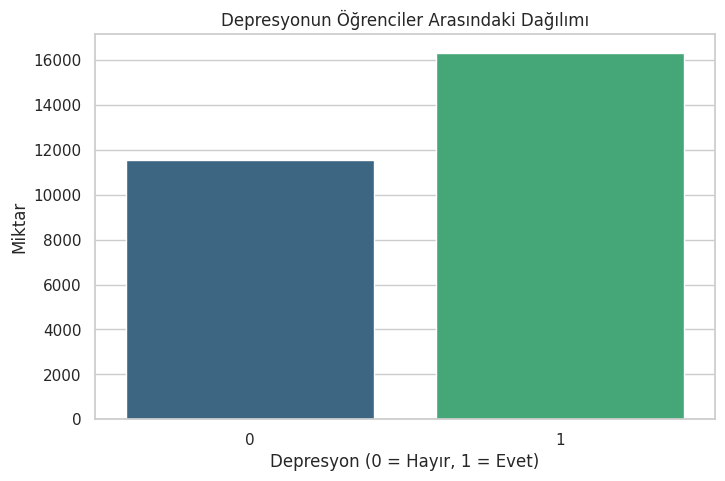

In [38]:
# 'Depression' sütunundaki değerlerin (0 ve 1) sayısını gösteren bir çubuk grafik oluşturur. Bu işlem depresyon durumunun veri setindeki dağılımını anlamak için kullanılır.
plt.figure(figsize=(8,5))
sns.countplot(x='Depression', data=df, palette="viridis")
plt.title("Depresyonun Öğrenciler Arasındaki Dağılımı")
plt.xlabel("Depresyon (0 = Hayır, 1 = Evet)")
plt.ylabel("Miktar")
plt.show()

---
# Grafik Analizi: Öğrenci Depresyon Dağılımı

Bu çubuk grafik öğrenci grubunda depresyon durumunun dağılımını göstermektedir (0 = Hayır, 1 = Evet). Depresyon belirtisi göstermeyen öğrenci sayısı yaklaşık 11.500 iken, depresyon belirtisi gösteren öğrenci sayısı 16.000'i aşmaktadır.

Bu durum öğrencilerin çoğunluğunda depresyon belirtilerinin varlığına işaret etmektedir. Grafik depresyonun önemli bir sorun olduğunu ve daha fazla araştırma ile müdahale gerektirdiğini göstermektedir.


---



# 3.2 Kategorik Değişkenlerin Analizi:
---


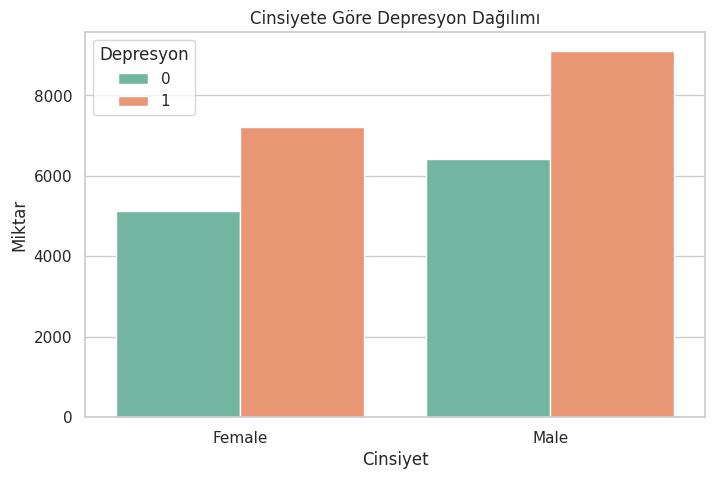

In [39]:
# Cinsiyet ve depresyon durumu arasındaki ilişkiyi gösteren bir gruplanmış çubuk grafik oluşturur. Bu işlem depresyonun cinsiyete göre nasıl değiştiğini anlamak için kullanılır.
plt.figure(figsize=(8,5))
sns.countplot(x='Gender', hue='Depression', data=df, palette="Set2")
plt.title("Cinsiyete Göre Depresyon Dağılımı")
plt.xlabel("Cinsiyet")
plt.ylabel("Miktar")
plt.legend(title="Depresyon")
plt.show()



---
# Grafik Analizi: Cinsiyete Göre Depresyon Dağılımı

Bu grafik cinsiyete göre depresyon durumunu (0 = Hayır, 1 = Evet) göstermektedir.

Hem kadın hem de erkek öğrencilerde depresyon gösterenlerin sayısı göstermeyenlerden fazladır. Ancak depresyon gösteren erkek öğrenci sayısı kadınlardan daha yüksektir. Bu grafik cinsiyetin depresyonla ilişkili olabileceğini düşündürmektedir.


---



# 3.3 Sayısal Değişkenlerin Dağılımı:



---



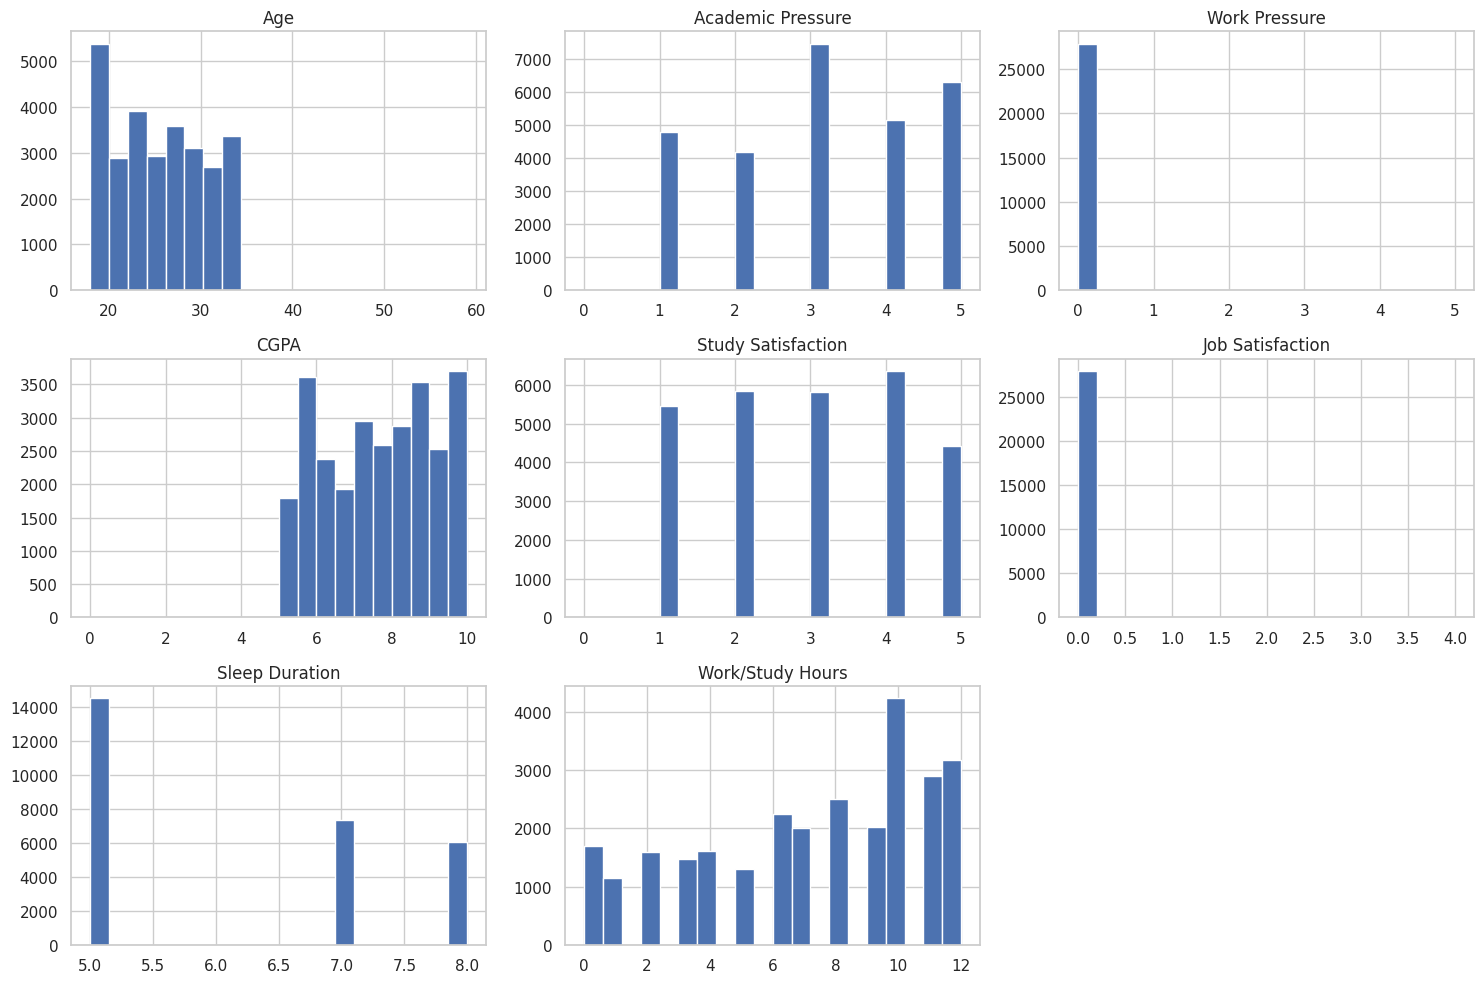

In [27]:
# Belirtilen sayısal sütunların her biri için histogramlar oluşturur. Bu işlem her bir değişkenin dağılımını anlamak için kullanılır.
num_features = ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA',
                'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration', 'Work/Study Hours']
df[num_features].hist(bins=20, figsize=(15,10))
plt.tight_layout()
plt.show()



---

# Grafik Analizi: Sayısal Değişkenlerin Dağılımı

Bu grafik seti çeşitli sayısal değişkenlerin dağılımlarını histogramlar aracılığıyla göstermektedir. Her bir histogram belirli bir değişkenin veri setindeki frekansını veya sıklığını temsil etmektedir.

- Age (Yaş): Yaş dağılımı genellikle 18 ile 25 yaş aralığında yoğunlaşmıştır, bu da veri setindeki katılımcıların çoğunlukla genç yetişkin veya üniversite öğrencisi olduğunu göstermektedir.

- Academic Pressure (Akademik Baskı): Akademik baskı, 3 ve 5 seviyelerinde yoğunlaşmıştır bu da öğrencilerin orta ve yüksek düzeyde akademik baskı hissettiğini göstermektedir.

- Work Pressure (İş Baskısı): İş baskısı neredeyse tamamen 0 seviyesinde yoğunlaşmıştır bu da katılımcıların çoğunun iş baskısı yaşamadığını veya bu baskının çok düşük seviyede olduğunu göstermektedir.

- CGPA (Not Ortalaması): Not ortalaması dağılımı, 7 ile 10 arasında nispeten düzgün bir dağılım göstermektedir bu da öğrencilerin genel olarak iyi bir akademik başarıya sahip olduğunu düşündürmektedir.

- Study Satisfaction (Çalışma Memnuniyeti): Çalışma memnuniyeti, 3 ve 4 seviyelerinde yoğunlaşmıştır bu da öğrencilerin orta düzeyde çalışma memnuniyetine sahip olduğunu göstermektedir.

- Job Satisfaction (İş Tatmini): İş tatmini neredeyse tamamen 0 seviyesinde yoğunlaşmıştır bu da katılımcıların çoğunun iş tatmini yaşamadığını veya bu tatminin çok düşük seviyede olduğunu göstermektedir.

- Sleep Duration (Uyku Süresi): Uyku süresi, 5 ve 7 saat civarında yoğunlaşmıştır bu da öğrencilerin çoğunun ortalama uyku süresine sahip olduğunu göstermektedir.

- Work/Study Hours (Çalışma/Ders Çalışma Saatleri): Çalışma/ders çalışma saatleri, 10 ile 12 saat arasında yoğunlaşmıştır bu da öğrencilerin günde uzun saatler çalıştığını veya ders çalıştığını göstermektedir.



---



# 3.4 Korelasyon Analizi:


---



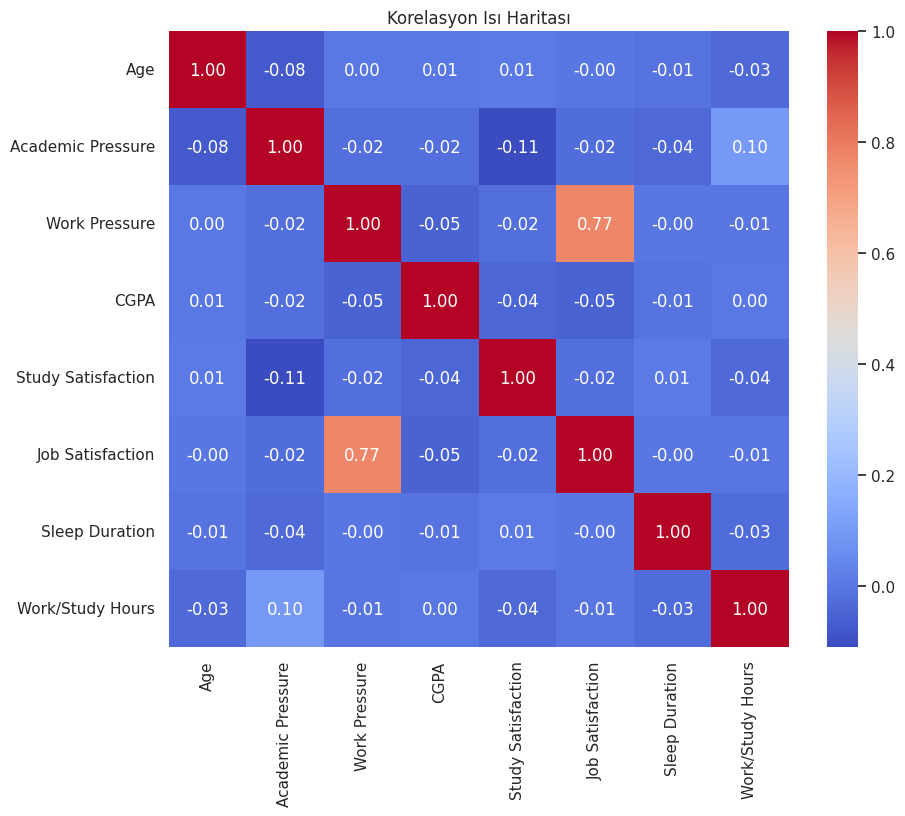

In [40]:
# Belirtilen sayısal sütunlar arasındaki korelasyon matrisini hesaplar.
plt.figure(figsize=(10,8))
num_cols = ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA',
            'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration', 'Work/Study Hours']
corr_matrix = df[num_cols].corr()

# Korelasyon matrisini bir ısı haritası olarak görselleştirir. Bu işlem değişkenler arasındaki ilişkilerin gücünü ve yönünü anlamak için kullanılır.
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelasyon Isı Haritası")
plt.show()



---

# Grafik Analizi: Korelasyon Isı Haritası

Bu grafik sayısal değişkenler arasındaki korelasyonları gösteren bir ısı haritasıdır.

Korelasyon iki değişken arasındaki doğrusal ilişkinin gücünü ve yönünü ölçer.

Isı haritasında renkler korelasyon katsayısını temsil eder:

- Kırmızı tonları pozitif korelasyonu (bir değişken artarken diğeri de artar)
- Mavi tonları negatif korelasyonu (bir değişken artarken diğeri azalır)
- Beyaz tonları ise düşük veya sıfır korelasyonu gösterir  

Sayılar korelasyon katsayısının değerini belirtir.

## Grafiği incelendiğinde şu önemli noktalar göze çarpmaktadır:

- Yaş (Age): Yaşın diğer değişkenlerle genellikle düşük korelasyona sahip olduğu görülmektedir. En yüksek korelasyon, negatif yönde Akademik Baskı (-0.08) ile gözlemlenmektedir ancak bu korelasyon da zayıftır.

- Akademik Baskı (Academic Pressure): Akademik Baskı'nın diğer değişkenlerle zayıf veya orta düzeyde korelasyona sahip olduğu görülmektedir. Çalışma Saatleri (0.10) ile pozitif bir ilişkisi vardır bu da akademik baskı arttıkça çalışma saatlerinin de biraz artabileceğini göstermektedir.

- Çalışma Baskısı (Work Pressure) ve İş Tatmini (Job Satisfaction): Bu iki değişken arasında güçlü bir pozitif korelasyon (0.77) bulunmaktadır. Bu iş baskısı arttıkça iş tatmininin de arttığını göstermektedir. Ancak önceki grafiklerde iş baskısının düşük seviyede olduğunu hatırlarsak, bu korelasyonun veri setindeki öğrenci olmayan katılımcılar için geçerli olabileceğini düşünebiliriz.

- CGPA (Not Ortalaması): CGPA'nın diğer değişkenlerle zayıf korelasyona sahip olduğu görülmektedir.

- Çalışma Memnuniyeti (Study Satisfaction): Çalışma Memnuniyeti'nin diğer değişkenlerle zayıf korelasyona sahip olduğu görülmektedir.

- Uyku Süresi (Sleep Duration): Uyku Süresi'nin diğer değişkenlerle zayıf korelasyona sahip olduğu görülmektedir.

- Çalışma/Ders Çalışma Saatleri (Work/Study Hours): Çalışma/Ders Çalışma Saatleri'nin Akademik Baskı (0.10) ile pozitif bir ilişkisi vardır ancak bu ilişki de orta düzeydedir.

Genel olarak bu ısı haritası veri setindeki sayısal değişkenler arasında güçlü doğrusal ilişkilerin sınırlı olduğunu göstermektedir. En dikkat çekici ilişki Çalışma Baskısı ve İş Tatmini arasındaki güçlü pozitif korelasyondur.



---



# 3.5 Plotly ile Gelişmiş Görselleştirme:



---



In [30]:
# CGPA ve Çalışma Memnuniyeti arasındaki ilişkiyi gösteren etkileşimli bir saçılım grafiği oluşturur.
# Depresyon durumuna göre renklendirir ve ek bilgiler (yaş, cinsiyet, akademik baskı) sağlar.

fig = px.scatter(df, x="CGPA", y="Study Satisfaction", color="Depression",
                 hover_data=['Age', 'Gender', 'Academic Pressure'],
                 title="Depresyona Göre CGPA ve Eğitim Memnuniyeti")
fig.show()



---

# Grafik Özeti: CGPA ve Çalışma Memnuniyeti İlişkisi (Depresyona Göre)

Bu saçılım grafiği öğrencilerin CGPA (Not Ortalaması) ile Çalışma Memnuniyeti arasındaki ilişkiyi depresyon durumlarına göre renk kodlaması kullanarak göstermektedir.

Yatay eksen CGPA'yı, dikey eksen Çalışma Memnuniyetini temsil etmektedir. Renk skalası öğrencilerin depresyon düzeyini (0'dan 1'e kadar) temsil etmektedir; koyu mor depresyonu olmayan öğrencileri, sarı ise yüksek düzeyde depresyonu olan öğrencileri göstermektedir.

## Grafik incelendiğinde şu gözlemler yapılabilir:

- Çalışma Memnuniyeti Seviyeleri: Çalışma Memnuniyeti genellikle 0, 1, 2, 3, 4 ve 5 gibi belirli seviyelerde kümelenmiştir; yani değişken sürekli değil, ayrık değerler almaktadır.

- CGPA Dağılımı: CGPA değerleri geniş bir aralıkta (yaklaşık 0'dan 10'a kadar) dağılmıştır.

- Depresyon ve CGPA: Düşük CGPA değerlerinde (0-5 aralığı) genellikle depresyonu olmayan öğrencilerin (koyu mor renk) yoğunlaştığı görülmektedir. Yüksek CGPA değerlerinde (6-10 aralığı) ise hem depresyonu olmayan hem de depresyonu olan (sarıya yakın renkler) öğrencilerin bulunduğu gözlemlenmektedir.

- Depresyon ve Çalışma Memnuniyeti: Her çalışma memnuniyeti seviyesinde, farklı depresyon düzeylerine sahip öğrenciler bulunmaktadır. Ancak genel bir eğilim olarak depresyonun artmasıyla birlikte çalışma memnuniyetinin düşüp düşmediği net bir şekilde görülememektedir.


Sonuç olarak, bu grafik CGPA ile Çalışma Memnuniyeti arasında belirgin bir doğrusal ilişki olmadığını ve depresyonun bu ilişkiyi karmaşıklaştırdığını göstermektedir.


---



# Adım 4: İstatistiksel Analiz

Bu adımda akademik baskı ile depresyon arasındaki ilişkiyi istatistiksel olarak test etmek için hipotez testleri uygulanır.


---



# 4.1 Hipotez Testi (Akademik Baskı ve Depresyon)


---



In [41]:
# Veri setini depresyonu olan ve olmayan öğrencilere göre iki gruba ayırır.
group_dep = df[df['Depression'] == 1]['Academic Pressure']
group_non_dep = df[df['Depression'] == 0]['Academic Pressure']

# Her iki grubun boyutunu yazdırır. İstatistiksel testlerin uygulanabilirliği için grup boyutları önemlidir.
print("Depresyonda olan grup büyüklüğü:", len(group_dep))
print("Depresyonda olmayan grup büyüklüğü:", len(group_non_dep))

# Her iki grupta da yeterli sayıda gözlem varsa (en az 3) testleri uygular.
if len(group_dep) >= 3 and len(group_non_dep) >= 3:
    # İki bağımsız grup arasındaki ortalama farkı test etmek için t-testi uygular.
    t_stat, p_val = stats.ttest_ind(group_dep, group_non_dep)
    print("T-test istatistiği: {:.3f}, p-value: {:.3f}".format(t_stat, p_val))

    # İki bağımsız grup arasındaki dağılım farkını test etmek için Mann-Whitney U testini uygular (non-parametrik test).
    u_stat, p_val_u = stats.mannwhitneyu(group_dep, group_non_dep)
    print("Mann-Whitney U test istatistiği: {:.3f}, p-value: {:.3f}".format(u_stat, p_val_u))
else:
    print("Gruplardan biri istatistiksel test için yeterli gözlem sayısına sahip değildir.")

Depressed group size: 16336
Non-depressed group size: 11565
T-test statistic: 90.119, p-value: 0.000
Mann-Whitney U test statistic: 145556846.500, p-value: 0.000


Test sonuçları (t-istatistiği, p-değeri, U-istatistiği, p-değeri) yazdırılır. P-değeri, hipotezin (gruplar arasında fark yok) doğru olma olasılığını gösterir. Düşük bir p-değeri (genellikle < 0.05) hipotezin reddedilmesi gerektiğini gösterir.

# Adım 5: Veri Tanımlayıcısı Çoğaltma

Bu adımda yeni özellikler oluşturulur ve kategorik değişkenler üretilir.

5.1 Bileşik Özellikler Oluşturma
Örneğin, Akademik ve İş Baskısını “Toplam Baskı” metriğinde birleştirin.

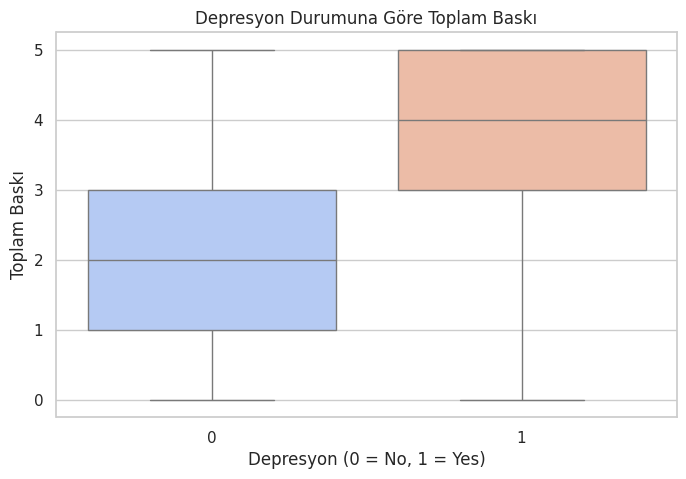

In [42]:
# 'Academic Pressure' ve 'Work Pressure' sütunlarını toplayarak 'Total Pressure' adında yeni bir sütun oluşturur. Bu işlem toplam baskı düzeyini temsil eder.
df['Total Pressure'] = df['Academic Pressure'] + df['Work Pressure']

plt.figure(figsize=(8,5))
sns.boxplot(x='Depression', y='Total Pressure', data=df, palette="coolwarm")
plt.title("Depresyon Durumuna Göre Toplam Baskı")
plt.xlabel("Depresyon (0 = No, 1 = Yes)")
plt.ylabel("Toplam Baskı")
plt.show()

6.2 Kategorik Değişkenlerin İçin Encoding

Makine öğrenimi için sayısal özelliklere ihtiyacımız vardır. Sıralı olmayan kategorik değişkenler için one-hot kodlamasını kullanabiliriz. Basit olması için burada birkaç önemli özelliği kodlayacağız.

In [36]:
# Encoding işlemi uygulanması gereken kategorik sütunların bir listesini tanımlar.
cat_features = ['Gender', 'City', 'Profession', 'Degree',
                'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness', 'Financial Stress']

# Belirtilen kategorik sütunları one-hot encoding kullanarak sayısal sütunlara dönüştürür.
df_encoded = pd.get_dummies(df, columns=cat_features, drop_first=True)

df_encoded.head()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Work/Study Hours,...,Degree_MSc,Degree_Others,Degree_PhD,Have you ever had suicidal thoughts ?_Yes,Family History of Mental Illness_Yes,Financial Stress_2.0,Financial Stress_3.0,Financial Stress_4.0,Financial Stress_5.0,Financial Stress_?
0,2,33.0,5.0,0.0,8.97,2.0,0.0,5.0,Healthy,3.0,...,False,False,False,True,False,False,False,False,False,False
1,8,24.0,2.0,0.0,5.90,5.0,0.0,5.0,Moderate,3.0,...,False,False,False,False,True,True,False,False,False,False
2,26,31.0,3.0,0.0,7.03,5.0,0.0,5.0,Healthy,9.0,...,False,False,False,False,True,False,False,False,False,False
3,30,28.0,3.0,0.0,5.59,2.0,0.0,7.0,Moderate,4.0,...,False,False,False,True,True,False,False,False,True,False
4,32,25.0,4.0,0.0,8.13,3.0,0.0,5.0,Moderate,1.0,...,False,False,False,True,False,False,False,False,False,False
